![스크린샷 2024-07-18 144549.png](<attachment:스크린샷 2024-07-18 144549.png>)
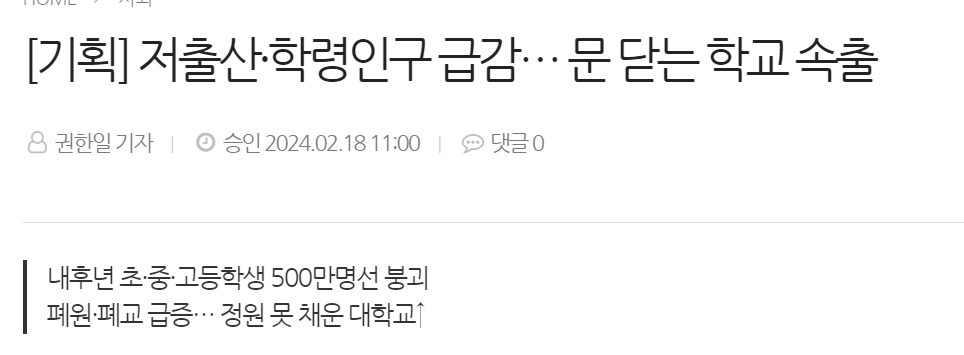

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_name=r"C:\Users\KDP15\Downloads\전출지_전입지_시도_별_이동자수_20240717201254.csv"
file_name2=r"C:\Users\KDP15\Downloads\교육통계학교수.csv"
file_name3=r"C:\Users\KDP15\Downloads\주요_연령계층별_추계인구_생산연령인구__고령인구_등__시도_20240717214938.csv"
file_name4=r"C:\Users\KDP15\Downloads\전출지_전입지_시도__성_연령_5세_별_이동자수_20240718114828.csv"

In [3]:
dataDF=pd.read_csv(file_name)
dataDF2=pd.read_csv(file_name2)
dataDF3=pd.read_csv(file_name3)

In [ ]:
dataDF

In [5]:

dataDF.drop(index=0,columns='전출지별',inplace=True) #

In [ ]:
#대구시 전입데이터
dataDF #대구기준 전입지

In [ ]:
dataDF3

In [8]:
dataDF3.drop(columns=['시나리오별(1)','시도별(1)'],inplace=True)


In [9]:
dataDF3['인구종류별(1)'] = dataDF3['인구종류별(1)'].str.replace('학령인구(천명): ', '')
dataDF3['인구종류별(1)'] = dataDF3['인구종류별(1)'].str.replace('청소년인구(천명): 9~24세', '청소년(9~24세)')


In [10]:
dataDF3.set_index('인구종류별(1)', inplace=True)

In [11]:
dataDF3

,2018,2019,2020,2021,2022,2023
인구종류별(1),,,,,,
계(6~21세),402,389,375,364,351,340
초등학교(6~11세),127,127,124,123,123,120
중학교(12~14세),65,63,64,64,62,62
고등학교(15~17세),79,72,68,64,62,63
대학교(18~21세),130,127,120,113,103,95
청소년(9~24세),444,429,416,402,385,373


In [12]:
dataDF2.columns

Index(['지역구분', ' 항목구분', ' 자료구분', ' 2018년', ' 2019년', ' 2020년', ' 2021년',
       ' 2022년'],
      dtype='object')

In [13]:
dataDF2.drop(columns=['지역구분',' 항목구분'],inplace=True)

In [14]:

dataDF2=dataDF2.rename(columns={' 2018년':'2018' , ' 2019년':'2019', ' 2020년':'2020', ' 2021년':'2021', ' 2022년':'2022'})


In [15]:
dataDF2.set_index(' 자료구분',inplace=True)

In [16]:
dataDF2

,2018,2019,2020,2021,2022
자료구분,,,,,
합계,826,812,803,804,793
공립,469,475,477,484,487
사립,357,337,326,320,306
유치원 소계,369,355,346,342,329
공립유치원,105,111,113,115,116
사립유치원,264,244,233,227,213
초등학교 소계,227,227,228,230,231
공립초등학교,223,223,224,226,227
사립초등학교,4,4,4,4,4


In [17]:
df23=pd.concat([dataDF2,dataDF3],ignore_index=False)

In [18]:
#df23.index

In [19]:
df_new=df23.loc[[' 유치원 소계',' 초등학교 소계',' 중학교 소계',' 고등학교 소계','계(6~21세)','초등학교(6~11세)','중학교(12~14세)','고등학교(15~17세)','대학교(18~21세)']]
#단위 천만명

In [20]:
df_new.isna().sum()

2018    0
2019    0
2020    0
2021    0
2022    0
2023    4
dtype: int64

In [21]:
# 결측값 채우기

decrease_avg=(df_new.loc[" 유치원 소계", "2018"] - df_new.loc[" 유치원 소계", "2022"]) / (2022 - 2018)
df_new.loc[" 유치원 소계", "2023"] = df23.loc[" 유치원 소계", "2022"] - decrease_avg

decrease_avg1=(df_new.loc[" 초등학교 소계", "2018"] - df_new.loc[" 초등학교 소계", "2022"]) / (2022 - 2018)
df_new.loc[" 초등학교 소계", "2023"] = df_new.loc[" 초등학교 소계", "2022"] - decrease_avg1

decrease_avg2=(df23.loc[" 중학교 소계", "2018"] - df_new.loc[" 중학교 소계", "2022"]) / (2022 - 2018)
df_new.loc[" 중학교 소계", "2023"] = df_new.loc[" 중학교 소계", "2022"] - decrease_avg2

decrease_avg3=(df23.loc[" 고등학교 소계", "2018"] - df_new.loc[" 고등학교 소계", "2022"]) / (2022 - 2018)
df_new.loc[" 고등학교 소계", "2023"] = df_new.loc[" 고등학교 소계", "2022"] - decrease_avg3



In [22]:
df_new['2023']=df_new['2023'].astype(int)  #2023을 정수형으로 변환해서 표현

In [23]:
df_new #인구단위 천만명

,2018,2019,2020,2021,2022,2023
유치원 소계,369,355,346,342,329,319
초등학교 소계,227,227,228,230,231,232
중학교 소계,124,124,123,124,124,124
고등학교 소계,92,92,92,93,93,93
계(6~21세),402,389,375,364,351,340
초등학교(6~11세),127,127,124,123,123,120
중학교(12~14세),65,63,64,64,62,62
고등학교(15~17세),79,72,68,64,62,63
대학교(18~21세),130,127,120,113,103,95


In [24]:
#df_new.index

In [25]:
df_new.loc[[' 초등학교 소계','초등학교(6~11세)']]

,2018,2019,2020,2021,2022,2023
초등학교 소계,227,227,228,230,231,232
초등학교(6~11세),127,127,124,123,123,120


In [26]:
df_new.loc[[' 중학교 소계','중학교(12~14세)']]

,2018,2019,2020,2021,2022,2023
중학교 소계,124,124,123,124,124,124
중학교(12~14세),65,63,64,64,62,62


In [27]:
df_new.loc[[' 고등학교 소계','고등학교(15~17세)']]

,2018,2019,2020,2021,2022,2023
고등학교 소계,92,92,92,93,93,93
고등학교(15~17세),79,72,68,64,62,63


학력인구급감으로 인한 폐교가 되는 학교가 늘고 있지만 제가 분석한 결과로는 실제 대구내의 큰 변화가 없고 오히려 초등학교의 경우 그 수가 증가하였습니다. 
실제로 폐교되는 협성중학교, 죽전중학교,경복중학교가 있었지만 신설되는 학교들로 팔공초,팔공중(동구 지묘동) ,연경초(북구 연경동),  대구국제고(북구 도남동), 대구공고 테크노폴리스 캠퍼스(달성군 유가읍), 대구예아람학교(달성군 옥포읍)등이 있음을 조사하였습니다.

In [28]:
#초등학생 감소율
des_e=100*(df_new.loc['초등학교(6~11세)','2018']-df_new.loc['초등학교(6~11세)','2023'])/df_new.loc['초등학교(6~11세)','2023']
#중학생
des_m=100*(df_new.loc['중학교(12~14세)','2018']-df_new.loc['중학교(12~14세)','2023'])/df_new.loc['중학교(12~14세)','2023']
#고등학생
des_h=100*(df_new.loc['고등학교(15~17세)','2018']-df_new.loc['고등학교(15~17세)','2023'])/df_new.loc['고등학교(15~17세)','2023']

In [29]:
df_new=df_new.loc[['초등학교(6~11세)','중학교(12~14세)','고등학교(15~17세)']]

In [30]:
df_new['감소율']=[des_e,des_m,des_h]

In [31]:
df_new

,2018,2019,2020,2021,2022,2023,감소율
초등학교(6~11세),127,127,124,123,123,120,5.833333
중학교(12~14세),65,63,64,64,62,62,4.838710
고등학교(15~17세),79,72,68,64,62,63,25.396825


In [32]:
dataDF4=pd.read_csv(file_name4)

In [33]:
dataDF4.columns

Index(['전출지별', '전입지별', '성별', '연령별', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [34]:
dataDF4.drop(index=0,columns=['전출지별','전입지별', '성별'],inplace=True) 

In [35]:
dataDF4.set_index('연령별',inplace=True)

순이동 -이면 전입은 없고 전출만있다는 의미입니다.

In [36]:
dataDF4.iloc[1:5] # 대구의 순인구이동 데이터

,2018,2019,2020,2021,2022,2023
연령별,,,,,,
0 - 4세,-537,-215,-168,-232,-893,-1340
5 - 9세,-33,147,182,-50,-683,-1049
10 - 14세,210,284,358,253,-224,-400
15 - 19세,1314,1587,996,1308,-67,448



시간이 지날수록 순이동데이터가 줄어드는 추세로 가고 있다.
